Will be used a machine learning, data generating is now in a python file. 

In [1]:
#standard modukles
import numpy as np
import random as random
import time
import pandas as pd
#using simpleguitk for display, is not needed for computer game
#likely not needed un this notebook 
import simpleguitk as simplegui
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
#for efficient saving and loading
import pickle
#skyjp game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for machine learning
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#time logging
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
#again tensorflow problem work before with conda install cudatoolkit, is not needed after each restart? 

2023-02-24 15:45:47.335089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-24 15:45:47.335125: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
names=['alpha','beta']
nature=['computer','computer']
levels=[0,0]
scores,turns,last_player,numeric=skyjo_round(names,nature,levels,0,True,True,True) 
print(numeric.shape)
#selected rows array
sel1=np.zeros((51))
#print the row to see whether it is what it should be 
#open card on pile
sel1[1]=1
#own card set
print(numeric[18:30,0])
sel1[18:30]=1
#other card set
print(numeric[30:42,0])
sel1[30:42]=1
#take open 
print(numeric[42])
sel1[42]=1
#discard
print(numeric[43])
sel1[43]=1
# discarded closed card
print(numeric[44])
sel1[44]=1
#id of selected player card
print(numeric[45])
sel1[45]=1
#numeric (number of open or 20 for closed) of selected player card
print(numeric[46])
sel1[46]=1
#score, differential is used as target for now both included in collection
print(numeric[49])
sel1[49]=1
print(numeric[50])
sel1[50]=1
print(sum(sel1))
print(numeric.shape)
# list of strings which will be pandas header
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')            
columns.append('score_self')
columns.append('score_other')
columns.append('round')
print(columns)
print(len(columns))
#create copy which to be used fields  score not
sel2=np.copy(sel1)
sel2[48:51]=0
#np.savetxt("xgb_model1_column2.txt",sel2)
print(sum(sel2))
print(sum(sel1))
print(sel2)
print(sel1)
print(columns[0:30])

(51, 44)
[20 20 20 20 20 20 10  2 20 20 20 20]
[20 20 20 20  6 20 20 20 20 20  0 20]
[1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 0 0]
[0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 1]
[30 30 30  8  3 30 30 10  3  6 30  2  5 30 30 30 11 30 11 30 -1 30  6 12
 30 30  3 30  6 30 30  3 30 30 30 30  9  7 30 30 30  0  0  3]
[ 4 10  4  8  6  0  1 11  5  3  4 11  2  6  1  9 10  3  0  8  2  8  3 10
  5 11  0  8  8  8  8  7 11  6  4  9  0  2  3 10 10  4  9  5]
[20  0 12 20 10 20 20 20 20 20  0  5 20 20 -2 20 20 -2 20  9  5 11 20  0
  3  2  5  5 20  5  2 20 20 12  6 -2  3 20  0 12 11  6 20 20]
[124  53 124  53 124  53 124  53 124  53 124  53 124  53 124  53 124  53
 124  53 124  53 124  53 124  53 124  53 124  53 124  53 124  53 124  53
 124  53 124  53 124  53 124  53]
[ 53 124  53 124  53 124  53 124  53 124  53 124  53 124  53 124  53 124
  53 124  53 124  53 124  53 124  53 124  53 124  53 124  53 124  53 124
  

In [3]:
path='/home/tobias/ml-testing/games/skyjo'
files=[f for f in os.listdir(path) 
                if f.startswith('level_rand_levels2_') and os.path.isfile(os.path.join(path, f))]
print(files)

['level_rand_levels2_200_4.pkl', 'level_rand_levels2_5000_0.pkl', 'level_rand_levels2_1000_9.pkl', 'level_rand_levels2_7000_1.pkl', 'level_rand_levels2_200_2.pkl', 'level_rand_levels2_100_1.pkl', 'level_rand_levels2_200_3.pkl', 'level_rand_levels2_7000_0.pkl', 'level_rand_levels2_100_2.pkl', 'level_rand_levels2_1000_3.pkl', 'level_rand_levels2_3000_1.pkl', 'level_rand_levels2_1000_1.pkl', 'level_rand_levels2_1000_2.pkl', 'level_rand_levels2_1000_5.pkl', 'level_rand_levels2_3000_0.pkl', 'level_rand_levels2_1000_7.pkl', 'level_rand_levels2_200_0.pkl', 'level_rand_levels2_200_1.pkl', 'level_rand_levels2_2000_0.pkl', 'level_rand_levels2_1000_0.pkl', 'level_rand_levels2_2000_2.pkl', 'level_rand_levels2_100_0.pkl', 'level_rand_levels2_2000_1.pkl', 'level_rand_levels2_1000_8.pkl', 'level_rand_levels2_1000_4.pkl', 'level_rand_levels2_1000_6.pkl']


Read and combine all files generated with computer mode 2.

In [4]:
df=pd.read_pickle(files[0])
for i in range(1,len(files)):
    print(i)
    df1=pd.read_pickle(files[i])
    df=pd.concat([df,df1],join='outer', ignore_index=True)
    #free space
    df1=0
print(df.shape,df.head())
#uses 14 files of 781901 cases will be still improved 
#now 19 files of 1616568 cases, last used 2.4 mio that should be reachable 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
(3015470, 33)    open_pile_card  own_cards_0  own_cards_1  own_cards_2  own_cards_3  \
0              11           20           20           20           20   
1              11            2           20           20           20   
2               9           20           20           20           20   
3              11            2           20           20           20   
4              11           20           20           20           20   

   own_cards_4  own_cards_5  own_cards_6  own_cards_7  own_cards_8  ...  \
0           20           20           20           11           20  ...   
1            9           20           20           20           20  ...   
2           20           20           20           11           20  ...   
3           11           20           20           20           20  ...   
4           20           20           20            9           20  ...   

   other_player_cards_10  othe

It are nearly 800000 rows, but less independent as before. Splitting in test and other sets. 

In [5]:
feature_train,feature_test,feature_valid, target_train,target_test,target_valid=split_test(df.iloc[:,0:30],df.score_self-df.score_other, df.iloc[:,32],0.4975,0.796)
print(feature_train.shape,feature_test.shape,target_test.shape,feature_train.head())
#get similar test train sizes as for step 1

1500196
1500212
2400314
2400322
(1500212, 30) (900110, 30) (900110,)    open_pile_card  own_cards_0  own_cards_1  own_cards_2  own_cards_3  \
0              11           20           20           20           20   
1              11            2           20           20           20   
2               9           20           20           20           20   
3              11            2           20           20           20   
4              11           20           20           20           20   

   own_cards_4  own_cards_5  own_cards_6  own_cards_7  own_cards_8  ...  \
0           20           20           20           11           20  ...   
1            9           20           20           20           20  ...   
2           20           20           20           11           20  ...   
3           11           20           20           20           20  ...   
4           20           20           20            9           20  ...   

   other_player_cards_7  other_player_car

Now applying standard XGBoost. 

In [12]:
#that is already updated to using 19 input files
ar=do_xgb(feature_train, target_train, feature_test, target_test,6,reg=0)
print(ar)

xgb took 89.1961 seconds
standard deviation of test 26.3669 points
standard deviation of train 26.5652  points
standard deviation of prediction-test 24.978 points
standard deviation of prediction-train 18.7453 points
[ 0.          6.         18.74527047 24.97796976]


There is an improvement but the difference between test and train is larger than when all values were independent.  Now especially large, could be because some outliers? 

Now I am trying different max depths and regulraizations as before. Starting with the regular depth of 6, but this time going done because the correlation is large.

In [13]:
#newest with 0 aftre maxd in the name besides for depth 3 
loop_reg(feature_train, target_train, feature_test, target_test,6,1000,1.414,20,"xgb_lev2_maxd06.txt")

doing case 0
xgb took 104.4043 seconds
standard deviation of test 26.3669 points
standard deviation of train 26.5652  points
standard deviation of prediction-test 24.9662 points
standard deviation of prediction-train 18.854 points
doing case 1
xgb took 147.5556 seconds
standard deviation of test 26.3669 points
standard deviation of train 26.5652  points
standard deviation of prediction-test 24.8977 points
standard deviation of prediction-train 18.8766 points
doing case 2
xgb took 136.2917 seconds
standard deviation of test 26.3669 points
standard deviation of train 26.5652  points
standard deviation of prediction-test 24.9074 points
standard deviation of prediction-train 18.9364 points
doing case 3
xgb took 151.3196 seconds
standard deviation of test 26.3669 points
standard deviation of train 26.5652  points
standard deviation of prediction-test 24.8454 points
standard deviation of prediction-train 18.9763 points
doing case 4
xgb took 134.189 seconds
standard deviation of test 26.3669 

In [15]:
resa=np.loadtxt('xgb_lev2_maxd3.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resa[3]),4)} of max-depth=3")
resb=np.loadtxt('xgb_lev2_maxd04.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resb[3]),4)} of max-depth=4")
resc=np.loadtxt('xgb_lev2_maxd05.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resc[3]),4)} of max-depth=5")
resd=np.loadtxt('xgb_lev2_maxd06.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resd[3]),4)} of max-depth=6")

minimum standard deviation of (prediction-test data) 24.9428 of max-depth=3
minimum standard deviation of (prediction-test data) 24.8231 of max-depth=4
minimum standard deviation of (prediction-test data) 24.7857 of max-depth=5
minimum standard deviation of (prediction-test data) 24.8454 of max-depth=6


The regularization of the best standard deviation is 15980.680753821336


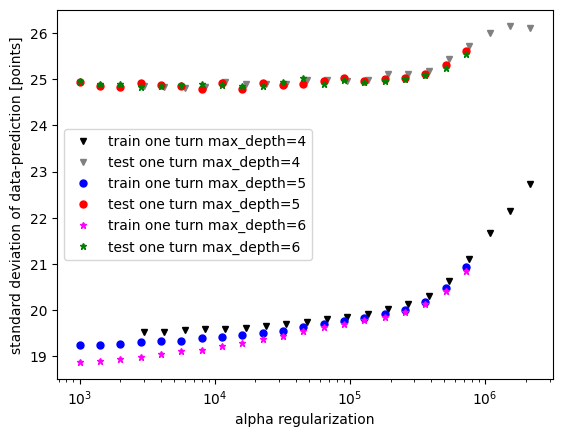

In [17]:
#plt.plot(resa[0],resa[2],'s',ms=5,color='orange',label='train one turn max_depth=3') 
#plt.plot(resa[0],resa[3],'s',ms=5,color='cyan',label='test one turn max_depth=3')
plt.plot(resb[0],resb[2],'v',ms=5,color='black',label='train one turn max_depth=4') 
plt.plot(resb[0],resb[3],'v',ms=5,color='gray',label='test one turn max_depth=4')
plt.plot(resc[0],resc[2],'o',ms=5,color='blue',label='train one turn max_depth=5') 
plt.plot(resc[0],resc[3],'o',ms=5,color='red',label='test one turn max_depth=5')
plt.plot(resd[0],resd[2],'*',ms=5,color='magenta',label='train one turn max_depth=6') 
plt.plot(resd[0],resd[3],'*',ms=5,color='green',label='test one turn max_depth=6')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")
print(f"The regularization of the best standard deviation is {resc[0,np.argmin(resc[3])]}") 

In [18]:

#excute best model
regxl28=XGBRegressor(max_depth=5,reg_alpha=15980.680753821336).fit(feature_train, target_train)
#and save it
regxl28.save_model("xgb_model3.json")



A smaller depth seems here better. That is not so suprising since while the same amount of data is used there is much more sharing between different rows than before. 
It is doubtful that it perform better thus. 

Other options should be explored. Deep learning seem natural, the fact that features are a combination of values and markers could make problems means it is only regression but also classification. Still, likely other models should be explored also.

Another options is extracting paramters for xgboost, natural is largest value of cards, average value, number of open, closed cards instead of the 12 card values, that are then 14 features. This is now applied.

In [5]:
df['own_n_closed']=df.loc[:,'own_cards_0':'own_cards_11'][df.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df['own_n_open']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=30) & (df.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df['own_max']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df['own_sum']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df['other_player_n_closed']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][df.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df['other_player_n_open']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)
df['other_player_max']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df['other_player_sum']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)

print(df.head())
print(df.columns)
#print(df.describe())

   open_pile_card  own_cards_0  own_cards_1  own_cards_2  own_cards_3  \
0              11           20           20           20           20   
1              11            2           20           20           20   
2               9           20           20           20           20   
3              11            2           20           20           20   
4              11           20           20           20           20   

   own_cards_4  own_cards_5  own_cards_6  own_cards_7  own_cards_8  ...  \
0           20           20           20           11           20  ...   
1            9           20           20           20           20  ...   
2           20           20           20           11           20  ...   
3           11           20           20           20           20  ...   
4           20           20           20            9           20  ...   

   score_other  round  own_n_closed  own_n_open  own_max  own_sum  \
0           66      0            10      

In [6]:
newcolumns=['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max',
       'own_sum', 'other_player_n_closed', 'other_player_n_open',
       'other_player_max', 'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value','numeric_player_card', 'score_self',
       'score_other', 'round']
#these to be used to make new df with those columns in this order 
#also exclude id player card since columns are now ignored anyway 

I now select these values. The basic order is retained, the last three are scores and rounds. That means there are now 13 features. 

In [7]:
df2=df.loc[:,newcolumns]
print(df2.columns)
print(df2.head())
print(df2.shape)
#empty df to save storage 
df=0

Index(['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max', 'own_sum',
       'other_player_n_closed', 'other_player_n_open', 'other_player_max',
       'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value', 'numeric_player_card', 'score_self', 'score_other',
       'round'],
      dtype='object')
   open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0              11            10           2     11.0     22.0   
1              11            10           2      9.0     11.0   
2               9            10           2     11.0     14.0   
3              11            10           2     11.0     13.0   
4              11            10           2      9.0     12.0   

   other_player_n_closed  other_player_n_open  other_player_max  \
0                     10                    2               9.0   
1                     10                    2              11.0   
2                     10                    2              11.0   
3        

In [10]:
print(df2.other_player_n_open.describe())

count    3.015470e+06
mean     5.778565e+00
std      3.126670e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      1.200000e+01
Name: other_player_n_open, dtype: float64


In [12]:
feature_train2,feature_test2,feature_valid2, target_train2,target_test2,target_valid2=split_test(df2.iloc[:,0:13],df2.score_self-df2.score_other, df2.iloc[:,15],0.4975,0.796)
print(feature_train2.shape,feature_test2.shape,target_test2.shape,feature_train2.head())

1500196
1500212
2400314
2400322
(1500212, 13) (900110, 13) (900110,)    open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0              11            10           2     11.0     22.0   
1              11            10           2      9.0     11.0   
2               9            10           2     11.0     14.0   
3              11            10           2     11.0     13.0   
4              11            10           2      9.0     12.0   

   other_player_n_closed  other_player_n_open  other_player_max  \
0                     10                    2               9.0   
1                     10                    2              11.0   
2                     10                    2              11.0   
3                     10                    2               9.0   
4                     10                    2              12.0   

   other_player_sum  action_take_open  action_discard  discard_value  \
0              11.0                 0               0            

In [13]:
ar=do_xgb(feature_train2, target_train2, feature_test2, target_test2,6,reg=0)
print(ar)

xgb took 67.0863 seconds
standard deviation of test 26.3669 points
standard deviation of train 26.5652  points
standard deviation of prediction-test 24.835 points
standard deviation of prediction-train 24.6859 points
[ 0.          6.         24.68594629 24.83497917]


The standard xgb is in test slightly worse then the best above. It is clearly worse in train, but that was overfitting. 
Above with feature enegering the test was 24.978, worse. 
It seems that is not much overfitting, thus I allow more depth in the test below. 

In [ ]:
#7 has run with new data set 
loop_reg(feature_train2, target_train2, feature_test2, target_test2,8,100,1.414,20,"xgb_lev2feat_eng_maxd8.txt")

doing case 0


In [16]:
resfb=np.loadtxt('xgb_lev2feat_eng_maxd4.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resfb[3]),4)} of max-depth=4")
resfc=np.loadtxt('xgb_lev2feat_eng_maxd5.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resfc[3]),4)} of max-depth=5")
resfd=np.loadtxt('xgb_lev2feat_eng_maxd6.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resfd[3]),4)} of max-depth=6")
resfe=np.loadtxt('xgb_lev2feat_eng_maxd7.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resfe[3]),4)} of max-depth=7")
#best above had standard deviation of 24.7857

minimum standard deviation of (prediction-test data) 21.271 of max-depth=4
minimum standard deviation of (prediction-test data) 21.2704 of max-depth=5
minimum standard deviation of (prediction-test data) 21.2748 of max-depth=6
minimum standard deviation of (prediction-test data) 24.8043 of max-depth=7


The regularization of the best standard deviation is 282.71459439999995


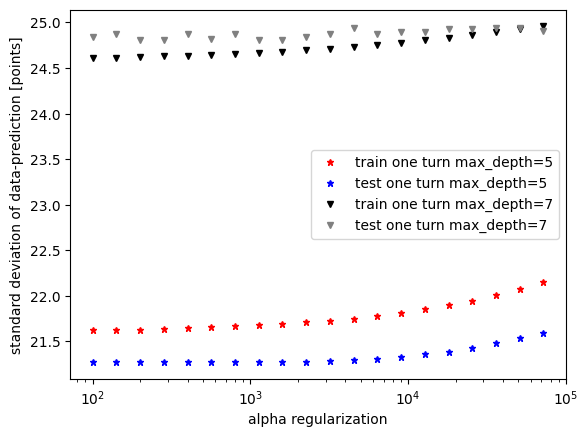

In [19]:
plt.plot(resfc[0],resfc[2],'*',ms=5,color='red',label='train one turn max_depth=5') 
plt.plot(resfc[0],resfc[3],'*',ms=5,color='blue',label='test one turn max_depth=5')
plt.plot(resfe[0],resfe[2],'v',ms=5,color='black',label='train one turn max_depth=7') 
plt.plot(resfe[0],resfe[3],'v',ms=5,color='gray',label='test one turn max_depth=7')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")
print(f"The regularization of the best standard deviation is {resfe[0,np.argmin(resfe[3])]}")

Below I am trying deep learning.

First the data frames needs to converted to numpy array for it.

In [6]:
feature_train=feature_train.to_numpy()
feature_test=feature_test.to_numpy()
target_train=target_train.to_numpy()
target_test=target_test.to_numpy()

I am starting with a dense network of just two layers. 

In [9]:
model_dl1 = Sequential(
    [              
        tf.keras.Input(shape=(30,)),   
        Dense(10, activation="relu", name="layer1"),
        Dense(1, activation="linear", name="layer2"),
    ], name = "model1"
) 

In [10]:
model_dl1.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [26]:
#first 10 now 100 added 
model_dl1.fit(
    feature_train,target_train,
    epochs=1000,batch_size=10000
)

Epoch 1/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8419
Epoch 2/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8323
Epoch 3/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8322
Epoch 4/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8047
Epoch 5/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.7984
Epoch 6/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8206
Epoch 7/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8198
Epoch 8/1000
81/81 [==============================] - 0s 5ms/step - loss: 503.7951
Epoch 9/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.7800
Epoch 10/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8114
Epoch 11/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.7843
Epoch 12/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.8299
E

81/81 [==============================] - 0s 4ms/step - loss: 503.2802
Epoch 195/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.2682
Epoch 196/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.3456
Epoch 197/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.3040
Epoch 198/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.3429
Epoch 199/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.2963
Epoch 200/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.2928
Epoch 201/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.2487
Epoch 202/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.3519
Epoch 203/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.2709
Epoch 204/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.2433
Epoch 205/1000
81/81 [==============================] - 0s 4ms/step - loss: 503.

81/81 [==============================] - 0s 4ms/step - loss: 502.5025
Epoch 387/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4838
Epoch 388/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.5338
Epoch 389/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.5158
Epoch 390/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.5378
Epoch 391/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4778
Epoch 392/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.5120
Epoch 393/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.5329
Epoch 394/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4960
Epoch 395/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.5001
Epoch 396/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4998
Epoch 397/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.

81/81 [==============================] - 0s 5ms/step - loss: 502.4590
Epoch 579/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4804
Epoch 580/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4032
Epoch 581/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4491
Epoch 582/1000
81/81 [==============================] - 0s 5ms/step - loss: 502.4573
Epoch 583/1000
81/81 [==============================] - 0s 5ms/step - loss: 502.4144
Epoch 584/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4290
Epoch 585/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4551
Epoch 586/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4355
Epoch 587/1000
81/81 [==============================] - 0s 5ms/step - loss: 502.3622
Epoch 588/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.5279
Epoch 589/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.

81/81 [==============================] - 0s 4ms/step - loss: 502.3752
Epoch 771/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3962
Epoch 772/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3475
Epoch 773/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4156
Epoch 774/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3668
Epoch 775/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4173
Epoch 776/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3973
Epoch 777/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4362
Epoch 778/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3983
Epoch 779/1000
81/81 [==============================] - 0s 5ms/step - loss: 502.4438
Epoch 780/1000
81/81 [==============================] - 0s 5ms/step - loss: 502.3705
Epoch 781/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.

81/81 [==============================] - 0s 4ms/step - loss: 502.3676
Epoch 963/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3324
Epoch 964/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.4358
Epoch 965/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3801
Epoch 966/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3647
Epoch 967/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3540
Epoch 968/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3524
Epoch 969/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3811
Epoch 970/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3214
Epoch 971/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3640
Epoch 972/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.3604
Epoch 973/1000
81/81 [==============================] - 0s 4ms/step - loss: 502.

In [12]:
print(feature_train.shape,target_train.shape)

(808297, 30) (808297,)


In [27]:
mtr=np.shape(feature_train)
mte=np.shape(feature_test)
#takes a minute
prediction_train = model_dl1.predict(feature_train[0:mtr[0]].reshape(mtr[0],mtr[1]))
prediction_test = model_dl1.predict(feature_test[0:mte[0]].reshape(mte[0],mte[1]))

15156/15156 [==============================] - 14s 917us/step


In [28]:
print(f"standard deviation of test {np.round(np.std(target_test),4)} points")
print(f"standard deviation of train {np.round(np.std(target_train),4)} points")
print(f"standard deviation of test {np.round(np.std(target_test-prediction_test.T),4)} points")
print(f"standard deviation of train {np.round(np.std(target_train-prediction_train.T),4)} points")

standard deviation of test 24.0924 points
standard deviation of train 24.1769 points
standard deviation of test 22.5609 points
standard deviation of train 22.4106 points


Comparing that with standard xgb which gets as standard deviation 21.7426 and 20.2503. 10 times 1000 gets
22.8033 and 22.6261. 100 times 1000 gets 22.6057 and 22.4528 still not close to converged.
Probably batch size not close to enough. 
Now trying 100*10000 Now  22.5609 22.4106 Seems still to go slowly, maybe not enough layers. Or is category nature of some the reason? Could be equivalent. 

In [29]:
model_dl2 = Sequential(
    [              
        tf.keras.Input(shape=(30,)),   
        Dense(15, activation="relu", name="layer1"),
        Dense(5, activation="relu", name="layer2"),        
        Dense(1, activation="linear", name="layer3"),
    ], name = "model1"
) 

In [30]:
model_dl2.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [69]:
#a little but not much slower
model_dl2.fit(
    feature_train,target_train,
    epochs=400,batch_size=10000
)

Epoch 1/400
81/81 [==============================] - 1s 5ms/step - loss: 487.1365
Epoch 2/400
81/81 [==============================] - 0s 5ms/step - loss: 486.5871
Epoch 3/400
81/81 [==============================] - 0s 5ms/step - loss: 486.7194
Epoch 4/400
81/81 [==============================] - 0s 5ms/step - loss: 486.7383
Epoch 5/400
81/81 [==============================] - 0s 5ms/step - loss: 486.6437
Epoch 6/400
81/81 [==============================] - 0s 5ms/step - loss: 486.5973
Epoch 7/400
81/81 [==============================] - 0s 5ms/step - loss: 486.6439
Epoch 8/400
81/81 [==============================] - 0s 5ms/step - loss: 486.5850
Epoch 9/400
81/81 [==============================] - 0s 5ms/step - loss: 486.6941
Epoch 10/400
81/81 [==============================] - 0s 5ms/step - loss: 486.6545
Epoch 11/400
81/81 [==============================] - 0s 5ms/step - loss: 486.6057
Epoch 12/400
81/81 [==============================] - 0s 5ms/step - loss: 486.7681
Epoch 13/400


81/81 [==============================] - 0s 5ms/step - loss: 486.5155
Epoch 197/400
81/81 [==============================] - 0s 5ms/step - loss: 486.3952
Epoch 198/400
81/81 [==============================] - 0s 5ms/step - loss: 486.4389
Epoch 199/400
81/81 [==============================] - 0s 5ms/step - loss: 486.4365
Epoch 200/400
81/81 [==============================] - 0s 5ms/step - loss: 486.4265
Epoch 201/400
81/81 [==============================] - 0s 5ms/step - loss: 486.3818
Epoch 202/400
81/81 [==============================] - 0s 5ms/step - loss: 486.4822
Epoch 203/400
81/81 [==============================] - 0s 5ms/step - loss: 486.4144
Epoch 204/400
81/81 [==============================] - 0s 5ms/step - loss: 486.5041
Epoch 205/400
81/81 [==============================] - 0s 5ms/step - loss: 486.5059
Epoch 206/400
81/81 [==============================] - 0s 5ms/step - loss: 486.4005
Epoch 207/400
81/81 [==============================] - 0s 5ms/step - loss: 486.4969
Epoch 

81/81 [==============================] - 0s 5ms/step - loss: 486.1865
Epoch 391/400
81/81 [==============================] - 0s 5ms/step - loss: 486.3273
Epoch 392/400
81/81 [==============================] - 0s 5ms/step - loss: 486.2701
Epoch 393/400
81/81 [==============================] - 0s 5ms/step - loss: 486.3063
Epoch 394/400
81/81 [==============================] - 0s 6ms/step - loss: 486.2314
Epoch 395/400
81/81 [==============================] - 1s 6ms/step - loss: 486.2650
Epoch 396/400
81/81 [==============================] - 0s 6ms/step - loss: 486.3355
Epoch 397/400
81/81 [==============================] - 0s 5ms/step - loss: 486.3589
Epoch 398/400
81/81 [==============================] - 0s 5ms/step - loss: 486.3851
Epoch 399/400
81/81 [==============================] - 0s 5ms/step - loss: 486.3185
Epoch 400/400
81/81 [==============================] - 0s 6ms/step - loss: 486.3044


In [70]:
mtr=np.shape(feature_train)
mte=np.shape(feature_test)
#takes a minute thus doing too often taht would slow it down a lot 
prediction_train2 = model_dl2.predict(feature_train[0:mtr[0]].reshape(mtr[0],mtr[1]))
prediction_test2 = model_dl2.predict(feature_test[0:mte[0]].reshape(mte[0],mte[1]))

15156/15156 [==============================] - 18s 1ms/step


In [71]:
print(f"standard deviation of test {np.round(np.std(target_test),4)} points")
print(f"standard deviation of train {np.round(np.std(target_train),4)} points")
print(f"standard deviation of test {np.round(np.std(target_test-prediction_test2.T),4)} points")
print(f"standard deviation of train {np.round(np.std(target_train-prediction_train2.T),4)} points")

standard deviation of test 24.0924 points
standard deviation of train 24.1769 points
standard deviation of test 22.1872 points
standard deviation of train 22.0453 points


After 20 22.8258 and 22.6636. After 220 22.3098 and  22.1292. Clearly better improving now than with 1 relu layer.  Still after 200 it seems to stall. After 400 more I get 22.2016 and  22.0549.
After 400 more I get 22.1872 and  22.0453. seems to stall. 

Compare to xgb on the data which has 21.7426  and 20.2503 for using the same data and when  21.5263 and 21.3506  the feature engetring is used. 

I  also use the feature engering data. 

Or adding even more layers since there no clear overfitting. 

In [72]:
model_dl2b = Sequential(
    [              
        tf.keras.Input(shape=(13,)),   
        #adding regularization
        Dense(10, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01), name="layer1"), 
        Dense(4, activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01), name="layer2"),        
        Dense(1, activation="linear", name="layer3"),
    ], name = "model_dl2b"
) 

In [73]:
model_dl2b.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

#feature_train2=feature_train2.to_numpy()
#feature_test2=feature_test2.to_numpy()
#target_train2=target_train2.to_numpy()
#target_test2=target_test2.to_numpy()
print(feature_train2)

[[11. 10.  0. ...  0.  3. 11.]
 [11. 10.  0. ...  0. 30.  9.]
 [ 9. 10.  0. ...  0.  9. 11.]
 ...
 [-2.  3.  0. ...  0. 30. 20.]
 [10.  1.  0. ...  1. 11. 20.]
 [11.  2.  0. ...  0.  9.  0.]]


In [74]:
#still nan regularization does not help 
model_dl2b.fit(
    feature_train2,target_train2,
    epochs=5,batch_size=10000
)

Epoch 1/5
81/81 [==============================] - 1s 5ms/step - loss: nan
Epoch 2/5
81/81 [==============================] - 0s 4ms/step - loss: nan
Epoch 3/5
81/81 [==============================] - 0s 4ms/step - loss: nan
Epoch 4/5
81/81 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/5
81/81 [==============================] - 0s 4ms/step - loss: nan


In [65]:
mtr=np.shape(feature_train2)
mte=np.shape(feature_test2)
#takes a minute
prediction_train3 = model_dl2b.predict(feature_train2[0:mtr[0]].reshape(mtr[0],mtr[1]))
prediction_test3 = model_dl2b.predict(feature_test2[0:mte[0]].reshape(mte[0],mte[1]))

15155/15155 [==============================] - 14s 940us/step


In [66]:
print(f"standard deviation of test {np.round(np.std(target_test2),4)} points")
print(f"standard deviation of train {np.round(np.std(target_train2),4)} points")
print(f"standard deviation of test {np.round(np.std(target_test2-prediction_test3.T),4)} points")
print(f"standard deviation of train {np.round(np.std(target_train2-prediction_train3.T),4)} points")

standard deviation of test 24.0925 points
standard deviation of train 24.1769 points
standard deviation of test nan points
standard deviation of train nan points


In [67]:
print(prediction_train3)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [75]:
#even more layers
model_dl3 = Sequential(
    [              
        tf.keras.Input(shape=(30,)),   
        Dense(20, activation="relu", name="layer1"),
        Dense(12, activation="relu", name="layer2"),     
        Dense(4, activation="relu", name="layer3"),        
        Dense(1, activation="linear", name="layer4"),
    ], name = "model3"
) 
model_dl3.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)


In [77]:
#110
model_dl3.fit(
    feature_train,target_train,
    epochs=100,batch_size=10000
)
#is improving fast 492, but that is still worse than what the 2 layer model had before 
#more running needed

Epoch 1/100
81/81 [==============================] - 1s 7ms/step - loss: 521.1448
Epoch 2/100
81/81 [==============================] - 0s 6ms/step - loss: 520.0187
Epoch 3/100
81/81 [==============================] - 0s 6ms/step - loss: 518.9448
Epoch 4/100
81/81 [==============================] - 0s 6ms/step - loss: 517.9707
Epoch 5/100
81/81 [==============================] - 0s 6ms/step - loss: 517.0075
Epoch 6/100
81/81 [==============================] - 1s 6ms/step - loss: 515.9370
Epoch 7/100
81/81 [==============================] - 1s 6ms/step - loss: 515.0507
Epoch 8/100
81/81 [==============================] - 0s 6ms/step - loss: 513.9315
Epoch 9/100
81/81 [==============================] - 0s 6ms/step - loss: 513.2241
Epoch 10/100
81/81 [==============================] - 0s 6ms/step - loss: 512.4639
Epoch 11/100
81/81 [==============================] - 0s 6ms/step - loss: 511.8160
Epoch 12/100
81/81 [==============================] - 0s 6ms/step - loss: 511.4802
Epoch 13/100


In [1]:
mtr=np.shape(feature_train)
mte=np.shape(feature_test)
#died, too large? could use subsets for doing it 
#or use some from
#https://github.com/keras-team/keras/issues/5337
#anyway shuld be solvable
prediction_train3 = model_dl3.predict(feature_train[0:mtr[0]].reshape(mtr[0],mtr[1]))
prediction_test3 = model_dl3.predict(feature_test[0:mte[0]].reshape(mte[0],mte[1]))

NameError: name 'np' is not defined